In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

# Option 1: Mount Google Drive
# # South
# import pandas as pd
# X_train_S = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_S.xlsx')
# X_test_S = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_S.xlsx')
# y_train_S = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_S.xlsx')
# y_test_S = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_S.xlsx')

# # East
# X_train_E = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_E.xlsx')
# X_test_E = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_E.xlsx')
# y_train_E = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_E.xlsx')
# y_test_E = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_E.xlsx')

# # West
# X_train_W = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_W.xlsx')
# X_test_W = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_W.xlsx')
# y_train_W = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_W.xlsx')
# y_test_W = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_W.xlsx')

# Option 2: Downloaded Files
# South
X_train_S = pd.read_excel('X_train_S.xlsx')
X_test_S = pd.read_excel('X_test_S.xlsx')
y_train_S = pd.read_excel('y_train_S.xlsx')
y_test_S = pd.read_excel('y_test_S.xlsx')

# East
X_train_E = pd.read_excel('X_train_E.xlsx')
X_test_E = pd.read_excel('X_test_E.xlsx')
y_train_E = pd.read_excel('y_train_E.xlsx')
y_test_E = pd.read_excel('y_test_E.xlsx')

# West
X_train_W = pd.read_excel('X_train_W.xlsx')
X_test_W = pd.read_excel('X_test_W.xlsx')
y_train_W = pd.read_excel('y_train_W.xlsx')
y_test_W = pd.read_excel('y_test_W.xlsx')

# Create and Test Model

In [40]:
import tensorflow as tf
import random
import os

# Used to maintain same random values
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

**South**

In [41]:
# Build LSTM model - South
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data
X_train_reshaped_S = X_train_S.values.reshape(X_train_S.shape[0], 1, X_train_S.shape[1])

# Create model
model_lstm_S = Sequential([
    LSTM(128, input_shape=(X_train_reshaped_S.shape[1], X_train_reshaped_S.shape[2]), return_sequences=False), # Input layer
    Dense(32, activation='relu'), # 1 hidden layer
    Dense(1)  # output layer
])

# Compile model
model_lstm_S.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
from sklearn.model_selection import train_test_split
# Split for validation set again
X_train_final_S, X_val_S, y_train_final_S, y_val_S = train_test_split(
                                                      X_train_S, y_train_S, test_size=0.1, random_state=42)

In [43]:
# Reshape for LSTM
X_train_final_reshaped_S = X_train_final_S.values.reshape(X_train_final_S.shape[0], 1, X_train_final_S.shape[1])
X_val_reshaped_S = X_val_S.values.reshape(X_val_S.shape[0], 1, X_val_S.shape[1])

In [44]:
# Train model
model_lstm_S.fit(
    X_train_final_reshaped_S, y_train_final_S,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_reshaped_S, y_val_S), # validation data
    shuffle=False
)

Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2235.2590 - val_loss: 757.7582
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 513.4447 - val_loss: 143.9489
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 92.1604 - val_loss: 35.9538
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.8096 - val_loss: 13.1151
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.4188 - val_loss: 4.4262
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7416 - val_loss: 2.5654
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6756 - val_loss: 2.2082
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.2389 - val_loss: 2.5270
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4666 - val_loss: 0.6855
Epoch 10/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3334 - val_loss: 2.1411
Epoch 11/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7868 - val_loss: 0.9131
Epoch 12/100
173/173 ━━━━━━

In [45]:
# Predict with this model
X_test_reshaped_S = X_test_S.values.reshape(X_test_S.shape[0], 1, X_test_S.shape[1]) # reshape X_test
# Predict
y_pred_lstm_S = model_lstm_S.predict(X_test_reshaped_S)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [46]:
# Show accuracy
from sklearn.metrics import mean_squared_error, r2_score
mse_S = mean_squared_error(y_test_S, y_pred_lstm_S)
r2_S= r2_score(y_test_S, y_pred_lstm_S)

print('South:')
print("Mean Squared Error:", mse_S)
print("R-squared:", r2_S)

South:
Mean Squared Error: 0.9361594319343567
R-squared: 0.9995237588882446


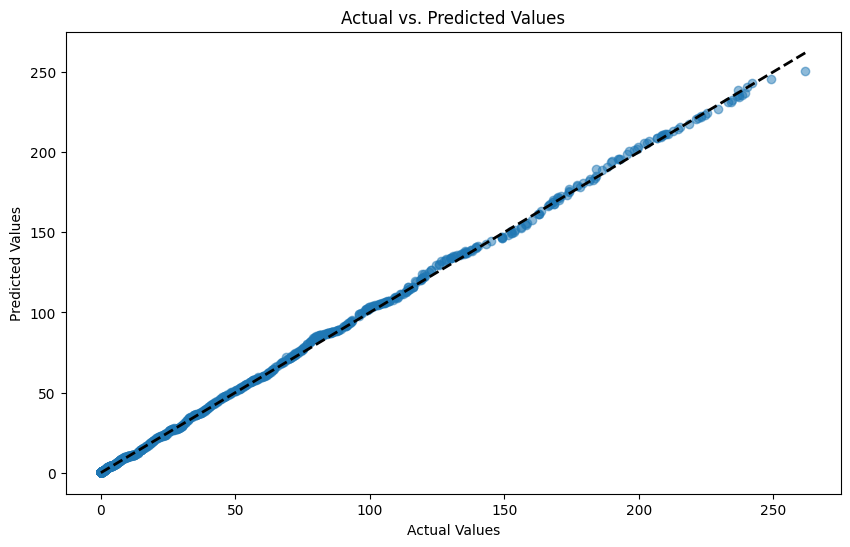

In [47]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_S, y_pred_lstm_S, alpha=0.5)
plt.plot([y_test_S.min(), y_test_S.max()], [y_test_S.min(), y_test_S.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**East**

In [48]:
# Build LSTM model - East
# Reshape data
X_train_reshaped_E = X_train_E.values.reshape(X_train_E.shape[0], 1, X_train_E.shape[1])

# Create model
model_lstm_E = Sequential([
    LSTM(128, input_shape=(X_train_reshaped_E.shape[1], X_train_reshaped_E.shape[2]), return_sequences=False), # Input layer
    Dense(32, activation='relu'), # 1 hidden layer
    Dense(1)  # output layer
])

# Compile model
model_lstm_E.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
from sklearn.model_selection import train_test_split
# Split for validation set again
X_train_final_E, X_val_E, y_train_final_E, y_val_E = train_test_split(
                                                      X_train_E, y_train_E, test_size=0.1, random_state=42)

In [50]:
# Reshape for LSTM
X_train_final_reshaped_E = X_train_final_E.values.reshape(X_train_final_E.shape[0], 1, X_train_final_E.shape[1])
X_val_reshaped_E = X_val_E.values.reshape(X_val_E.shape[0], 1, X_val_E.shape[1])

In [51]:
# Train model
model_lstm_E.fit(
    X_train_final_reshaped_E, y_train_final_E,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_reshaped_E, y_val_E), # validation dataset
    shuffle=False
)

Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1501.1046 - val_loss: 482.9130
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 243.9601 - val_loss: 40.5611
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 23.4874 - val_loss: 11.3712
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3925 - val_loss: 2.9311
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7745 - val_loss: 3.3086
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9024 - val_loss: 11.5580
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5511 - val_loss: 0.4036
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7021 - val_loss: 0.9166
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5262 - val_loss: 3.8481
Epoch 10/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9608 - val_loss: 2.4596
Epoch 11/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0833 - val_loss: 0.6797
Epoch 12/100
173/173 ━━━━━━━━━

In [52]:
# Predict with this model
X_test_reshaped_E = X_test_E.values.reshape(X_test_E.shape[0], 1, X_test_E.shape[1]) # reshape
y_pred_lstm_E = model_lstm_E.predict(X_test_reshaped_E)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [53]:
# Show accuracy
from sklearn.metrics import mean_squared_error, r2_score
mse_E = mean_squared_error(y_test_E, y_pred_lstm_E)
r2_E= r2_score(y_test_E, y_pred_lstm_E)

print('East')
print("Mean Squared Error:", mse_E)
print("R-squared:", r2_E)

East
Mean Squared Error: 4.566905498504639
R-squared: 0.9969449043273926


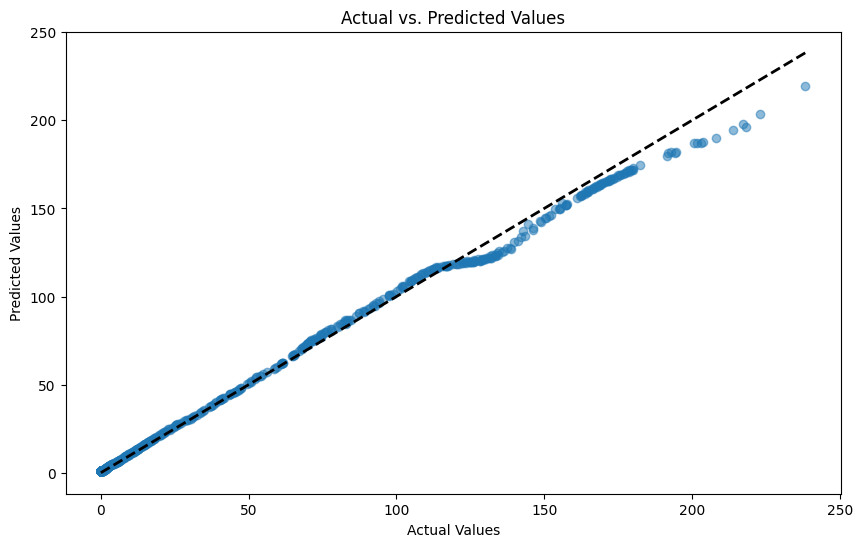

In [54]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_E, y_pred_lstm_E, alpha=0.5)
plt.plot([y_test_E.min(), y_test_E.max()], [y_test_E.min(), y_test_E.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**West**

In [55]:
# Build LSTM model - East
# Reshape data
X_train_reshaped_W = X_train_W.values.reshape(X_train_W.shape[0], 1, X_train_W.shape[1])

# Create model
model_lstm_W = Sequential([
    LSTM(128, input_shape=(X_train_reshaped_W.shape[1], X_train_reshaped_W.shape[2]), return_sequences=False), # Input layer
    Dense(32, activation='relu'), # 1 hidden layer
    Dense(1)  # output layer
])

# Compile model
model_lstm_W.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
from sklearn.model_selection import train_test_split
# Split for validation set again
X_train_final_W, X_val_W, y_train_final_W, y_val_W = train_test_split(
                                                      X_train_W, y_train_W, test_size=0.1, random_state=42)

In [57]:
# Reshape for LSTM
X_train_final_reshaped_W = X_train_final_W.values.reshape(X_train_final_W.shape[0], 1, X_train_final_W.shape[1])
X_val_reshaped_W = X_val_W.values.reshape(X_val_W.shape[0], 1, X_val_W.shape[1])

In [58]:
# Train model
model_lstm_W.fit(
    X_train_final_reshaped_W, y_train_final_W,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_reshaped_W, y_val_W), # validation data
    shuffle=False
)

Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1222.1521 - val_loss: 329.6517
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 264.7693 - val_loss: 39.3712
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37.7880 - val_loss: 10.0694
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.0155 - val_loss: 6.0592
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.8936 - val_loss: 3.9097
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5277 - val_loss: 3.3486
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0088 - val_loss: 2.5914
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1430 - val_loss: 2.7430
Epoch 9/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.7824 - val_loss: 1.4487
Epoch 10/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3254 - val_loss: 1.2273
Epoch 11/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8086 - val_loss: 2.0965
Epoch 12/100
173/173 ━━━━━━━━━

In [59]:
# Predict with this model
X_test_reshaped_W = X_test_W.values.reshape(X_test_W.shape[0], 1, X_test_W.shape[1]) # reshape
y_pred_lstm_W = model_lstm_W.predict(X_test_reshaped_W)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [60]:
# Show accuracy
from sklearn.metrics import mean_squared_error, r2_score
mse_W = mean_squared_error(y_test_W, y_pred_lstm_W)
r2_W= r2_score(y_test_W, y_pred_lstm_W)

print('West:')
print("Mean Squared Error:", mse_W)
print("R-squared:", r2_W)

West:
Mean Squared Error: 1.1350828409194946
R-squared: 0.9990887641906738


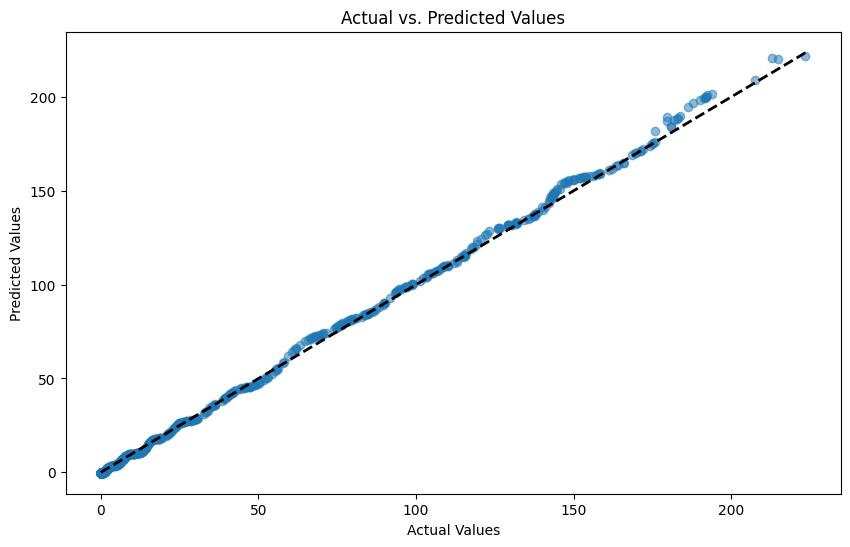

In [61]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_W, y_pred_lstm_W, alpha=0.5)
plt.plot([y_test_W.min(), y_test_W.max()], [y_test_W.min(), y_test_W.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Predict with 2023 Data

In [62]:
# Import 2023 data
#from google.colab import drive
#drive.mount('/content/drive')

# Option 1: Mount Google Drive
# South
# import pandas as pd
# X_train_S_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_S_23.xlsx')
# X_test_S_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_S_23.xlsx')
# y_train_S_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_S_23.xlsx')
# y_test_S_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_S_23.xlsx')

# # East
# X_train_E_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_E_23.xlsx')
# X_test_E_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_E_23.xlsx')
# y_train_E_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_E_23.xlsx')
# y_test_E_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_E_23.xlsx')

# # West
# X_train_W_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_W_23.xlsx')
# X_test_W_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_W_23.xlsx')
# y_train_W_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_W_23.xlsx')
# y_test_W_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_W_23.xlsx')

# Option 2: Downloaded Files
# South
X_train_S_23 = pd.read_excel('X_train_S_23.xlsx')
X_test_S_23 = pd.read_excel('X_test_S_23.xlsx')
y_train_S_23 = pd.read_excel('y_train_S_23.xlsx')
y_test_S_23 = pd.read_excel('y_test_S_23.xlsx')

# East
X_train_E_23 = pd.read_excel('X_train_E_23.xlsx')
X_test_E_23 = pd.read_excel('X_test_E_23.xlsx')
y_train_E_23 = pd.read_excel('y_train_E_23.xlsx')
y_test_E_23 = pd.read_excel('y_test_E_23.xlsx')

# West
X_train_W_23 = pd.read_excel('X_train_W_23.xlsx')
X_test_W_23 = pd.read_excel('X_test_W_23.xlsx')
y_train_W_23 = pd.read_excel('y_train_W_23.xlsx')
y_test_W_23 = pd.read_excel('y_test_W_23.xlsx')

In [63]:
# Shape
# South
print('X_train_S_23 shape:', X_train_S_23.shape)
print('X_test_S_23 shape:', X_test_S_23.shape)
print('y_train_S_23 shape:', y_train_S_23.shape)
print('y_test_S_23 shape:', y_test_S_23.shape)

print()

# East
print('X_train_E_23 shape:', X_train_E_23.shape)
print('X_test_E_23 shape:', X_test_E_23.shape)
print('y_train_E_23 shape:', y_train_E_23.shape)
print('y_test_E_23 shape:', y_test_E_23.shape)

print()

# West
print('X_train_W_23 shape:', X_train_W_23.shape)
print('X_test_W_23 shape:', X_test_W_23.shape)
print('y_train_W_23 shape:', y_train_W_23.shape)
print('y_test_W_23 shape:', y_test_W_23.shape)

X_train_S_23 shape: (6132, 5)
X_test_S_23 shape: (2628, 5)
y_train_S_23 shape: (6132, 1)
y_test_S_23 shape: (2628, 1)

X_train_E_23 shape: (6132, 5)
X_test_E_23 shape: (2628, 5)
y_train_E_23 shape: (6132, 1)
y_test_E_23 shape: (2628, 1)

X_train_W_23 shape: (6132, 5)
X_test_W_23 shape: (2628, 5)
y_train_W_23 shape: (6132, 1)
y_test_W_23 shape: (2628, 1)


In [64]:
# Rename columns
X_test_S_23 = X_test_S_23.rename(columns={'poa_direct_eff': 'poa_direct'})
X_test_E_23 = X_test_E_23.rename(columns={'poa_direct_eff': 'poa_direct'})
X_test_W_23 = X_test_W_23.rename(columns={'poa_direct_eff': 'poa_direct'})

In [65]:
# Reshape X_test
X_test_S_23_reshape = X_test_S_23.values.reshape(X_test_S_23.shape[0], 1, X_test_S_23.shape[1])
X_test_E_23_reshape = X_test_E_23.values.reshape(X_test_E_23.shape[0], 1, X_test_E_23.shape[1])
X_test_W_23_reshape = X_test_W_23.values.reshape(X_test_W_23.shape[0], 1, X_test_W_23.shape[1])

In [66]:
# Predict with 2023 data
# South
y_pred_S_23 = model_lstm_S.predict(X_test_S_23_reshape)  # Use X_test_S_23 for prediction
mse_test_S_23 = mean_squared_error(y_test_S_23, y_pred_S_23)  # Use y_test_S_23 for evaluation
r2_test_S_23 = r2_score(y_test_S_23, y_pred_S_23)
print('Test MSE South 2023:', mse_test_S_23)
print('Test R^2 South 2023:', r2_test_S_23)

print()
# East
y_pred_E_23 = model_lstm_E.predict(X_test_E_23_reshape)  # Use X_test_E_23 for prediction
mse_test_E_23 = mean_squared_error(y_test_E_23, y_pred_E_23)  # Use y_test_E_23 for evaluation
r2_test_E_23 = r2_score(y_test_E_23, y_pred_E_23)
print('Test MSE East 2023:', mse_test_E_23)
print('Test R^2 East 2023:', r2_test_E_23)

print()
# West
y_pred_W_23 = model_lstm_W.predict(X_test_W_23_reshape)  # Use X_test_W_23 for prediction
mse_test_W_23 = mean_squared_error(y_test_W_23, y_pred_W_23)  # Use y_test_W_23 for evaluation
r2_test_W_23 = r2_score(y_test_W_23, y_pred_W_23)
print('Test MSE West 2023:', mse_test_W_23)
print('Test R^2 West 2023:', r2_test_W_23)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE South 2023: 0.8138628602027893
Test R^2 South 2023: 0.9995488524436951

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE East 2023: 4.966193675994873
Test R^2 East 2023: 0.9963397979736328

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE West 2023: 0.892900288105011
Test R^2 West 2023: 0.9993812441825867


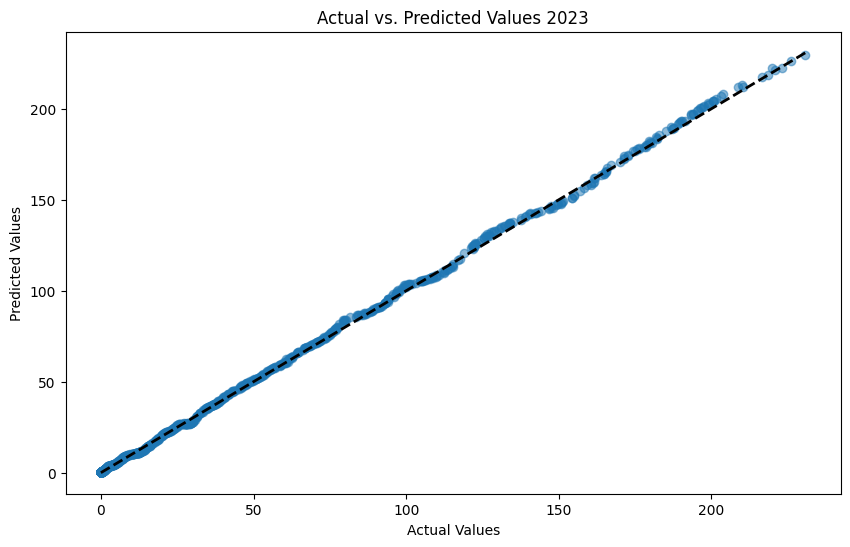

In [67]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_S_23, y_pred_S_23, alpha=0.5)
plt.plot([y_test_S_23.min(), y_test_S_23.max()], [y_test_S_23.min(), y_test_S_23.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Values 2023')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

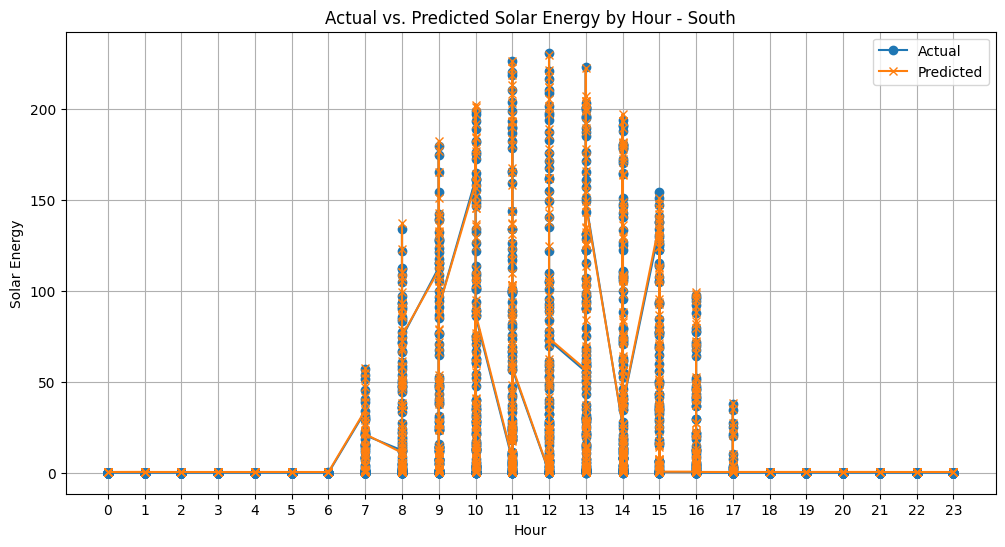

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Energy vs Hour Plot with South

# Create a DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_S_23['Hour'], 'Actual': y_test_S_23.iloc[:,0], 'Predicted': y_pred_S_23[:,0]})

# Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# Plot actual and predicted values wrt hour
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy by Hour - South')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()

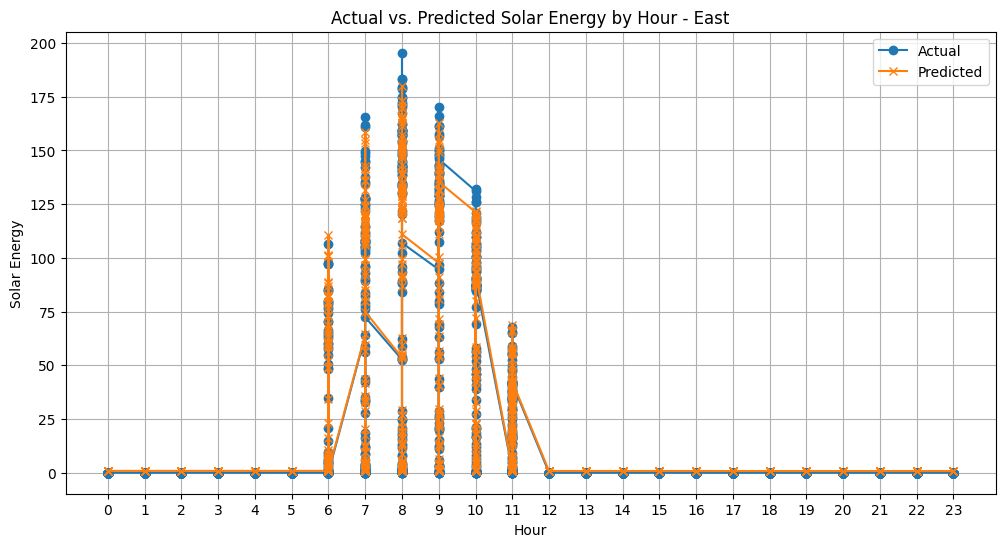

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Energy vs Hour Plot with East

# Create a DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_E_23['Hour'], 'Actual': y_test_E_23.iloc[:,0], 'Predicted': y_pred_E_23[:,0]})

# Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# Plot the actual and predicted values wrt hour
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy by Hour - East')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()

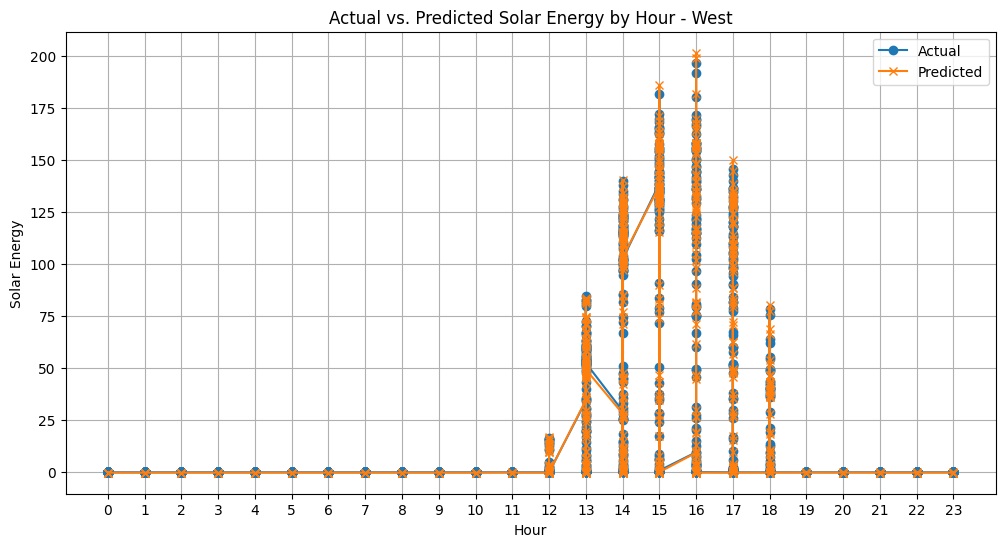

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Energy vs Hour Plot with West

# Create a DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_W_23['Hour'], 'Actual': y_test_W_23.iloc[:,0], 'Predicted': y_pred_W_23[:,0]})

# Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# Plot actual and predicted values wrt hour
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy by Hour - West')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()